In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from wdtools import *

In [3]:
# this can take about 9 - 11 minutes
start = time.time()
all_taxlot = combine_taxlot(yearstart=2009, yearend=2017)
end = time.time()
print(f'it took {round((end - start)/60, 0)} minutes to complete')

2009
2011
2012
2014
2015
2016
it took 10.0 minutes to complete


In [4]:
setID = 'Set007'; nm_to_add = 4972

In [5]:
wd = combine_wd_tables(setID=setID, nm_to_add=nm_to_add)

In [6]:
df = pd.DataFrame(columns = ['wetdet_delin_number', 'record_ID', 'field', 'cor_type', 'from', 'to'])

In [7]:
ml = 'N'
#ml = 'Y'

In [281]:
notes = pd.read_csv(os.path.join(inpath + '\\output\\to_review\\', f'review_unmatched_{setID}_r2_{ml}_0.csv'))

In [285]:
# not missing lots
wids = [wid for wid in notes.wetdet_delin_number.unique() if wid not in df.wetdet_delin_number.unique()]

In [286]:
notes = notes[notes.wetdet_delin_number.isin(wids)]

In [10]:
notes.columns

Index(['wetdet_delin_number', 'trsqq', 'parcel_id', 'county', 'latitude',
       'longitude', 'DecisionLink', 'record_ID', 'IDyear', 'correct_type',
       'correction', 'cor_trsqq', 'ORTaxlot'],
      dtype='object')

In [282]:
notes.shape

(17, 13)

In [287]:
i=0

In [290]:
i = i+1

In [320]:
i = 16

In [294]:
notes

,wetdet_delin_number,trsqq,parcel_id,county,latitude,longitude,DecisionLink,record_ID,IDyear,correct_type,correction,cor_trsqq,ORTaxlot
0,WD2008-0325,08N10W27,201,Clatsop,46.148233,-123.914622,https://docs.dsl.state.or.us/PublicReview/docv...,4992,2008,to review,"there is not any matched lot, need to review t...",08N10W27CA,0408.00N10.00W27CA--000000400
6,WD2008-0302,08N10W33C,1200,Clatsop,46.130039,-123.930139,https://docs.dsl.state.or.us/PublicReview/Elec...,4991,2008,QQ,from C0 to CD,08N10W33CD,0408.00N10.00W33CD--000001500
7,WD2011-0063,22S10E02,200,Deschutes,43.701500,-121.505100,https://docs.dsl.state.or.us/PublicReview/Elec...,5304,2011,section number,from 02 to 00,22S10E0000,0922.00S10.00E0000--000001002
8,WD2008-0294,17S12E22,102,Deschutes,44.091100,-121.266190,https://docs.dsl.state.or.us/PublicReview/Elec...,5270,2008,lot number,"lot number ['102'] might be incorrect, the mat...",17S12E22,0917.00S12.00E2200--000000104
13,WD2009-0135,08N10W27,201,Clatsop,45.390510,-122.457330,https://docs.dsl.state.or.us/PublicReview/Elec...,5034,2009,to review,"there is not any matched lot, need to review t...",02S03E1700,0302.00S03.00E1700--000003400
14,WD2015-0266,20S18E20,2500,Deschutes,43.824000,-120.590200,https://docs.dsl.state.or.us/PublicReview/docv...,5373,2015,section number,from 20 to 00,20S18E0000,0920.00S18.00E0000--000002500
16,WD2008-0343,08S10W27,202,Clatsop,46.143700,-123.902070,https://docs.dsl.state.or.us/PublicReview/Elec...,4993,2008,to review,"there is not any matched lot, need to review t...",08N10W27DD,0408.00N10.00W27DD--000000100


In [321]:
notes.loc[i, ['wetdet_delin_number', 'record_ID', 'trsqq', 'county', 'correct_type', 
              'correction', 'cor_trsqq', 'parcel_id', 'ORTaxlot']]

wetdet_delin_number                                          WD2008-0343
record_ID                                                           4993
trsqq                                                           08S10W27
county                                                           Clatsop
correct_type                                                   to review
correction             there is not any matched lot, need to review t...
cor_trsqq                                                     08N10W27DD
parcel_id                                                            202
ORTaxlot                                   0408.00N10.00W27DD--000000100
Name: 16, dtype: object

In [322]:
wdID = notes.loc[i,'wetdet_delin_number']
url = wd.loc[wd.wetdet_delin_number == wdID, 'DecisionLink'].values[0]
if str(url) == 'nan':
    print('Decision link is not available')
else:
    webbrowser.open(url)
selcols = ['wetdet_delin_number', 'county', 'trsqq', 'parcel_id', 'latitude', 'longitude', 'record_ID', 'notes', 'status_name', 'is_batch_file']
wd.loc[wd.wetdet_delin_number == wdID, selcols]

,wetdet_delin_number,county,trsqq,parcel_id,latitude,longitude,record_ID,notes,status_name,is_batch_file
20,WD2008-0343,Clatsop,08S10W27,202,46.1437,-123.90207,4993,,Completed by DSL,Y


In [268]:
all_taxlot[all_taxlot.ORTaxlot==notes.loc[i,'ORTaxlot']]

,year,ORTaxlot,geometry
714478,2011,0407.00N09.00W08C0--000000600,"POLYGON ((465778.119 1603861.280, 465756.290 1..."
2091438,2012,0407.00N09.00W08C0--000000600,"POLYGON ((465776.584 1603859.709, 465754.754 1..."
3563291,2014,0407.00N09.00W08C0--000000600,"POLYGON ((465776.584 1603859.709, 465754.754 1..."
5250469,2015,0407.00N09.00W08C0--000000600,"POLYGON ((465776.584 1603859.709, 465754.754 1..."
6960867,2016,0407.00N09.00W08C0--000000600,"MULTIPOLYGON (((465778.119 1603861.280, 465756..."


<AxesSubplot:>

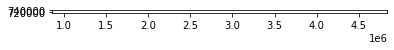

In [301]:
all_taxlot[all_taxlot.ORTaxlot==notes.loc[i,'ORTaxlot']].plot()

In [302]:
lon=wd.loc[wd.wetdet_delin_number == wdID, 'longitude'].values[0]
lat=wd.loc[wd.wetdet_delin_number == wdID, 'latitude'].values[0]
get_point_from_lonlat(lon=lon, lat=lat)

,Longitude,Latitude,geometry
0,-121.5051,43.7015,POINT (1046584.555 712985.706)


In [299]:
taxlot = create_ORTaxlot(cnt_code=cnt_dict['Deschutes'], trsqq='22S10E02', lot='1002')
print(taxlot)

0922.00S10.00E0200--000001002


In [300]:
taxlot in all_txid

False

In [76]:
all_taxlot[all_taxlot.ORTaxlot==taxlot]

,year,ORTaxlot,geometry
810645,2011,0916.00S12.00E31D0--000004800,"MULTIPOLYGON (((1094765.050 871962.922, 109476..."
2198705,2012,0916.00S12.00E31D0--000004800,"MULTIPOLYGON (((4703629.272 902211.817, 470362..."
3692916,2014,0916.00S12.00E31D0--000004800,"MULTIPOLYGON (((1094765.258 871962.208, 109476..."
5468078,2015,0916.00S12.00E31D0--000004800,"MULTIPOLYGON (((1094765.258 871962.208, 109476..."
7111397,2016,0916.00S12.00E31D0--000004800,"MULTIPOLYGON (((1094765.050 871962.922, 109476..."


In [17]:
print(notes.loc[i, 'correction'])

some lots are not matched, need to review trsqq, the close-match is 08N10W25


In [303]:
ctyp = notes.loc[i,'correct_type']#.split(' and ')[1]
ctyp

'section number'

In [141]:
ctyp = 'QQ'

In [304]:
crt = notes.loc[i,'correction']
crt

'from 02 to 00'

In [226]:
ft = crt.split('from ')[1].split(' to ')
ft

['20', '00']

In [86]:
ft = ['1N1E33AC', '01N01E33AC']

In [73]:
ft[0] = '00'

In [38]:
ft[1] = 'DB'

In [39]:
ft

['Multnomah', 'Washington']

In [135]:
f = crt.split('from ')[1].split(' and ')[0]
t = crt.split(' to ')[1].split(' and ')[0]

In [142]:
f = crt.split(' and ')[1].split(' to ')[0]
t = crt.split(' and ')[2]

In [143]:
print(f, t)

00 CD


In [305]:
rID = notes.loc[i,'record_ID']
rID

5304

In [283]:
df = pd.read_csv(os.path.join(inpath + '\\output\\to_review\\', f'unmatched_df_{setID}_r2_{ml}_notes.csv'))

In [271]:
'09S35.5E00'.replace(df.loc[3, 'from'], df.loc[3, 'to'])

'09S35VE00'

In [306]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'trsqq', 'cor_type': ctyp, 'from': ft[0], 'to': ft[1]},
        ignore_index = True)

In [78]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'trsqq', 'cor_type': 'section number', 'from': 13, 'to': 31},
        ignore_index = True)

In [232]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'trsqq', 'cor_type': 'QQ', 'from': 'D0', 'to': '00'},
        ignore_index = True)

In [59]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'county', 'cor_type': ctyp, 'from': ft[0], 'to': ft[1]},
        ignore_index = True)

In [308]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'parcel_id', 'cor_type': 'parcel id', 'from': '200', 'to': '1002'},
        ignore_index = True)

In [144]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'trsqq', 'cor_type': ctyp, 'from': f, 'to': t},
        ignore_index = True)

In [597]:
df = df.append({'wetdet_delin_number': wdID, 'record_ID': rID, 'field': 'county', 'cor_type': 'county', 'from': 'Benton', 'to': 'Polk'},
        ignore_index = True)

In [309]:
df

,wetdet_delin_number,record_ID,field,cor_type,from,to
0,WD2015-0283,5234,trsqq,QQ,0,D0
1,WD2013-0169,5148,trsqq,township direction,S,N
2,WD2012-0073,5314,trsqq,section number,13,31
3,WD2015-0297,5375,trsqq,range direction,W,E
4,WD2015-0061,5360,trsqq,section number,6,0
5,WD2016-0255,5260,trsqq,QQ,0,BD
6,WD2016-0001,5247,trsqq,township number,9,8
7,WD2016-0001,5247,trsqq,QQ,0,CD
8,WD2009-0155,5036,trsqq,QQ,0,BB
9,WD2015-0449,5383,trsqq,QQ,0,DD


In [70]:
df.loc[2, 'field'] = 'parcel_id'

In [310]:
df.to_csv(os.path.join(inpath + '\\output\\to_review\\', f'unmatched_df_{setID}_r2_{ml}_notes.csv'), index=False)

In [186]:
df.shape

(12, 6)

In [187]:
r1df = pd.read_csv(os.path.join(inpath + f'\\output\\to_review\\unmatched_df_{setID}_r1_N.csv'))

In [188]:
r1df.columns

Index(['wetdet_delin_number', 'trsqq', 'parcel_id', 'address_location_desc',
       'city', 'county', 'site_name', 'site_desc', 'latitude', 'longitude',
       'DocumentName', 'DecisionLink', 'is_batch_file', 'status_name',
       'received_date', 'Coord-Source', 'response_date',
       'reissuance_response_date', 'project_id', 'site_id', 'record_ID',
       'notes', 'recyear', 'IDyear', 'missinglot'],
      dtype='object')

In [189]:
wdIDs = r1df.wetdet_delin_number.unique()

In [190]:
wdIDs

array(['WD2008-0440', 'WD2008-0113'], dtype=object)

In [191]:
i = 0

In [198]:
i = i + 1

In [89]:
i

5

In [243]:
# need to create the notes first
#df = pd.read_csv(os.path.join(inpath + '\\output\\to_review\\', f'unmatched_df_{setID}_r1_{ml}_notes.csv'))

In [199]:
r1df.loc[r1df.wetdet_delin_number == wdIDs[i], ['wetdet_delin_number', 'trsqq', 'parcel_id', 'county', 
                                                'latitude', 'longitude', 'record_ID', 'notes', 'status_name', 'is_batch_file']]

,wetdet_delin_number,trsqq,parcel_id,county,latitude,longitude,record_ID,notes,status_name,is_batch_file
4,WD2008-0113,08N10W35,201,Clatsop,46.137236,-123.874483,4978,NaN,Approved,N
5,WD2008-0113,08N10W35,201,Clatsop,46.137236,-123.874483,4980,NaN,Approved,N
6,WD2008-0113,08N10W35,201,Clatsop,46.137236,-123.874483,4979,NaN,Approved,N


In [200]:
url = r1df.loc[r1df.wetdet_delin_number == wdIDs[i], 'DecisionLink'].values[0]
if str(url) == 'nan':
    print('Decision link is not available')
else:
    webbrowser.open(url)

In [194]:
j=0

In [202]:
sel = r1df.wetdet_delin_number == wdIDs[i]

In [254]:
j = j + 1

In [427]:
j

1

In [203]:
crt = review_wd_record_w_coord(wd_id=wdIDs[i], 
                         county_to_check=r1df.loc[sel, 'county'].values[j], 
                         trsqq_to_check=r1df.loc[sel, 'trsqq'].values[j], 
                         parcel_IDs_to_check=r1df.loc[sel, 'parcel_id'].values[j], 
                         lon=r1df.loc[sel, 'longitude'].values[j], 
                         lat=r1df.loc[sel, 'latitude'].values[j], 
                         taxlot=all_taxlot, 
                         year=r1df.loc[sel, 'IDyear'].values[j])
print(crt)

reviewing WD2008-0113
there is not any matched lot, need to review trsqq, the close-match is 08N10W36
lots to check: ['201'], and lots to compare: ['100', '200', '300', '500', '1706', '1800', '1900', '1901', '2000', '2001', '2100', '2101', '2400', '2500', '2600', '2700', '2701', '2704', '2707', '2900', '3000', 'ROADS', 'WATER']
('to review', 'there is not any matched lot, need to review trsqq, the close-match is 08N10W36')


In [204]:
lon=wd.loc[wd.wetdet_delin_number == wdIDs[i], 'longitude'].values[0]
lat=wd.loc[wd.wetdet_delin_number == wdIDs[i], 'latitude'].values[0]
get_point_from_lonlat(lon=lon, lat=lat)

,Longitude,Latitude,geometry
0,-123.874483,46.137236,POINT (456831.787 1616930.213)


In [205]:
df = pd.DataFrame(columns = ['wetdet_delin_number', 'record_ID', 'field', 'cor_type', 'from', 'to'])

In [206]:
wdIDs[i]

'WD2008-0113'

In [207]:
df = df.append({'wetdet_delin_number': wdIDs[i],
                'record_ID': r1df.loc[sel, 'record_ID'].values[j],
                'field': 'trsqq', 
                'cor_type': 'section number', 
                'from': '35', 
                'to': '36'},
        ignore_index = True)

In [208]:
df = df.append({'wetdet_delin_number': wdIDs[i],
                'record_ID': r1df.loc[sel, 'record_ID'].values[j],
                'field': 'parcel_id', 
                'cor_type': 'parcel id', 
                'from': '201', 
                'to': '2400'},
        ignore_index = True)

In [209]:
df

,wetdet_delin_number,record_ID,field,cor_type,from,to
0,WD2008-0113,4978,trsqq,section number,35,36
1,WD2008-0113,4978,parcel_id,parcel id,201,2400


In [210]:
ml

'N'

In [263]:
ml = 'N'

In [211]:
df.to_csv(os.path.join(inpath + '\\output\\to_review\\', f'unmatched_df_{setID}_r1_{ml}_notes.csv'), index=False)